# Tarea N°3 - Máquinas de Aprendizaje - ILI393
### Martín Villanueva A.

In [23]:
#parameters to try on MPL
mlp_params = {'hidden_layer_sizes':[(25,),(50,),(75,),(100,)], 'learning_rate_init':[0.0001, 0.0005, 0.001, 0.005]}

##############################################################
Dataset: 0
Best parameter: {'learning_rate_init': 0.005, 'hidden_layer_sizes': (25,)}
CV scores:
mean: 0.65451, std: 0.01308, params: {'learning_rate_init': 0.0001, 'hidden_layer_sizes': (25,)}
mean: 0.65104, std: 0.00225, params: {'learning_rate_init': 0.0005, 'hidden_layer_sizes': (25,)}
mean: 0.65104, std: 0.00225, params: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (25,)}
mean: 0.76215, std: 0.04703, params: {'learning_rate_init': 0.005, 'hidden_layer_sizes': (25,)}
mean: 0.65104, std: 0.00225, params: {'learning_rate_init': 0.0001, 'hidden_layer_sizes': (50,)}
mean: 0.65104, std: 0.00225, params: {'learning_rate_init': 0.0005, 'hidden_layer_sizes': (50,)}
mean: 0.65451, std: 0.00783, params: {'learning_rate_init': 0.001, 'hidden_layer_sizes': (50,)}
mean: 0.70139, std: 0.04904, params: {'learning_rate_init': 0.005, 'hidden_layer_sizes': (50,)}
mean: 0.65104, std: 0.00225, params: {'learning_rate_init': 0.0001, 

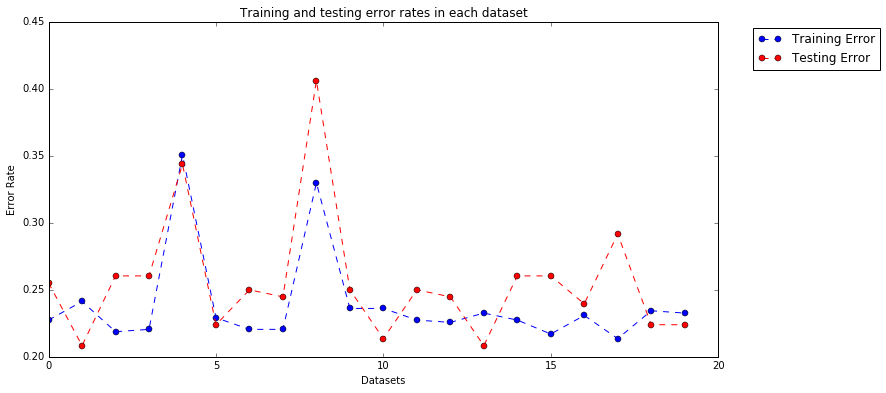

IndexError: list index out of range

In [25]:
mlp = MLPClassifier(activation='logistic', algorithm='sgd', learning_rate='constant')
mlp_tr_err, mlp_ts_err = solve_clf(mlp, params=mlp_params, show=range(20))

## AdaBoost

##############################################################
Dataset: 0
Training error: 0.180555555556
Testing error: 0.244791666667
##############################################################


##############################################################
Dataset: 1
Training error: 0.210069444444
Testing error: 0.223958333333
##############################################################


##############################################################
Dataset: 2
Training error: 0.175347222222
Testing error: 0.307291666667
##############################################################


##############################################################
Dataset: 3
Training error: 0.208333333333
Testing error: 0.265625
##############################################################


##############################################################
Dataset: 4
Training error: 0.1875
Testing error: 0.21875
##############################################################


#####################

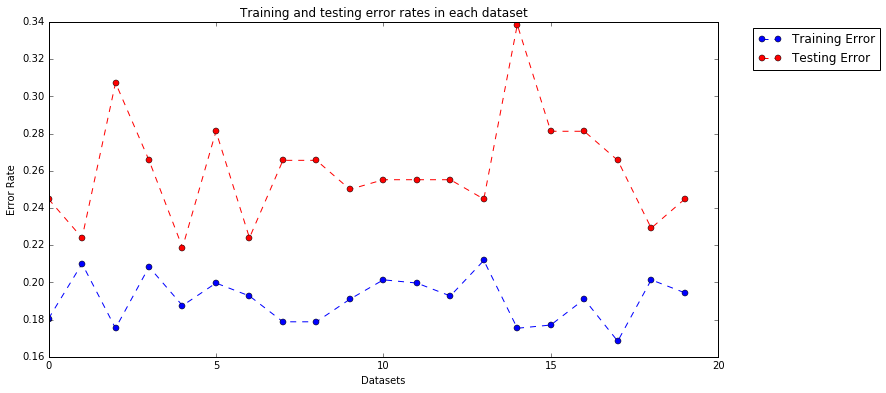

In [296]:
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=20)
adaboost_tr_err, adaboost_ts_err = solve_clf(clf, scale=False, show=range(20))

## Bagging

##############################################################
Dataset: 0
Training error: 0.237847222222
Testing error: 0.25
##############################################################


##############################################################
Dataset: 1
Training error: 0.237847222222
Testing error: 0.223958333333
##############################################################


##############################################################
Dataset: 2
Training error: 0.223958333333
Testing error: 0.328125
##############################################################


##############################################################
Dataset: 3
Training error: 0.246527777778
Testing error: 0.270833333333
##############################################################


##############################################################
Dataset: 4
Training error: 0.263888888889
Testing error: 0.223958333333
##############################################################


################

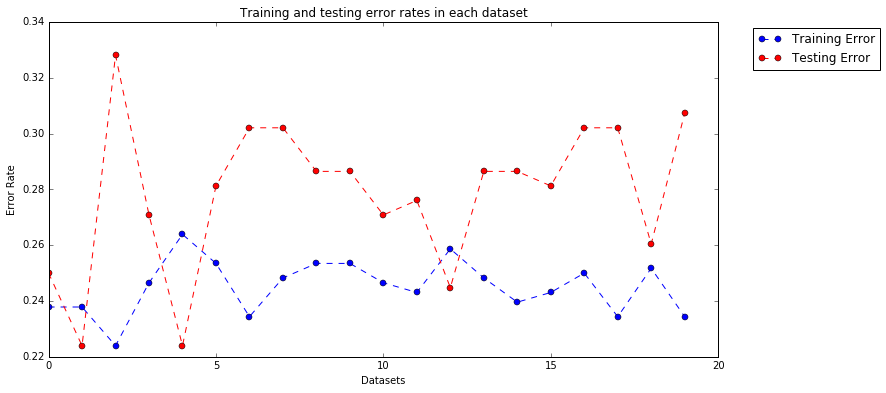

In [295]:
clf = Bagging(n_estimators=20, max_depth=1)
bagging_tr_err, bagging_ts_err = solve_clf(clf, scale=False, show=range(20))

## Anexo de Código

**Observación:** Para la correcta ejecución del código en el informe, primero se deben ejecutar las celdas del anexo de código aquí abajo.

### Configuración del notebook

In [30]:
#notebook settings
%matplotlib inline

#import some useful libraries and utilities
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import AdaBoostClassifier as AdaBoost

### Configuración del notebook

## Métricas de error para clasificación

In [128]:
#precision
def precision(yreal, ypred):
    yr = yreal.astype(int)
    yp = ypred.astype(int) 
    m, = yr.shape
    #number of good predictions/number of predictions
    return np.sum(yp==yr)/float(m)

#error rate 
def error_rate(yreal, ypred):
    return 1.-precision(yreal, ypred)

## Funciones complementarias (helpers) para obtener resultados

In [290]:
"""
Function to generate histogram of winners
"""
def make_hist(winners,params):
    for key in winners:
        par = params[key]
        win = np.array(winners[key])
        freqs = np.zeros(5)
        for i in xrange(5):
            freqs[i] = np.sum(par[i]==win)
        labels = map(str,par)
        pos = np.arange(len(labels))
        width = 1.0
        fig = plt.figure()
        fig.set_figheight(5)
        fig.set_figwidth(5)
        ax = plt.axes()
        ax.set_xticks(pos + (width / 2))
        ax.set_xticklabels(labels)
        plt.xlabel('Parameters')
        plt.ylabel('Frequency')
        plt.title('Histogram of {0}'.format(key))
        plt.bar(pos, freqs, width, color='0.5')
        plt.show()
    
def plot_error(tr_err, ts_err):
    x = np.arange(20)
    plt.figure(figsize=(12,6))
    plt.plot(x, tr_err, marker='o', linestyle='--', color='b', label='Training Error')
    plt.plot(x, ts_err, marker='o', linestyle='--', color='r', label='Testing Error')
    plt.xlabel('Datasets')
    plt.ylabel('Error Rate')
    plt.title('Training and testing error rates in each dataset')
    plt.legend(bbox_to_anchor=(1.25, 1.0))
    plt.show()
    
def comparative_plot(errors, labels, err_type=None):
    x = np.arange(20)
    colors = cm.rainbow(np.linspace(0., 1., len(errors)))
    plt.figure(figsize=(12,6))
    for i in xrange(len(errors)):
        plt.plot(x, errors[i], marker='o', linestyle='--', color=colors[i], label=labels[i])
    plt.xlabel('Datasets')
    plt.ylabel(err_type+' error rates')
    plt.legend(bbox_to_anchor=(1.25, 1.0))
    plt.show()    

"""
Generate solutions for classification problems
"""
def solve_clf(clf, params=None, scale=True, show=None):
    if params is not None:
        winners = dict()
        for key in params:
            winners[key] = list()
            
    #set dataset name
    path = './diabetes/diabetes'
    
    #error-rates to plot
    tr_err = np.empty(20)
    ts_err = np.empty(20)
    
    #iterate through data
    for i in xrange(20):
        #loading datasets
        tr_file = path+'-tr-{0}.npy'.format(i)
        ts_file = path+'-ts-{0}.npy'.format(i)
            
        tr_data = np.load(tr_file)
        ts_data = np.load(ts_file)
        
        if scale:
            #perform same scaling on training and testing sets
            scaler = StandardScaler()
            scaler.fit(tr_data[:,:-1])
            X_tr = scaler.transform(tr_data[:,:-1])
            X_ts = scaler.transform(ts_data[:,:-1])
        else: 
            X_tr = tr_data[:,:-1]
            X_ts = ts_data[:,:-1]
        y_tr = np.ascontiguousarray(tr_data[:,-1])
        y_ts = np.ascontiguousarray(ts_data[:,-1])

        if params is not None:
            #tunning parameters
            gs = GridSearchCV(clf, params, cv=5, n_jobs=2)
            gs.fit(X_tr, y_tr)
            grid_scores = gs.grid_scores_
            best_params = gs.best_params_
            for key in winners:
                winners[key].append(best_params[key])
            #traininig with best parameters
            clf.set_params(**best_params)
            clf.fit(X_tr, y_tr)
        else:
            clf.fit(X_tr, y_tr)
        
        #computing errors
        tr_err[i] = error_rate(y_tr, clf.predict(X_tr))
        ts_err[i] = error_rate(y_ts, clf.predict(X_ts))
        
        if (show is not None) and (i not in show): continue
        print "##############################################################"
        print "Dataset: {0}".format(i)
        if params is not None:
            print 'Best parameter: {0}'.format(best_params)
            print 'CV scores:'
            for result in grid_scores: print result
        print 'Training error: {0}'.format(tr_err[i])
        print 'Testing error: {0}'.format(ts_err[i])
        print "##############################################################"
        print '\n'
    
    #ploting errors
    if show: 
        plot_error(tr_err, ts_err)
        #if params is not None: make_hist(winners, params)
    return (tr_err,ts_err)

## Implementación de Bagging

In [192]:
class Bagging(BaseEstimator,ClassifierMixin):
    def __init__(self, n_estimators=5, max_depth=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        
    def fit(self, X, y):
        #list where estimators will be stored
        estimators = []
        #indexes of X
        ind = np.arange(X.shape[0])
        #fitting all the classifiers
        for i in xrange(self.n_estimators):
            #bootstraped indexes
            b_ind = resample(ind, replace=True)
            clf = DecisionTree(max_depth=self.max_depth)
            clf.fit(X[b_ind], y[b_ind])
            estimators.append(clf)
        #storing results
        self.estimators = estimators
        return self
    
    def predict(self, X):
        #array with probabilies of classes
        prob = np.zeros((X.shape[0],2))
        for clf in self.estimators:
            prob += clf.predict_proba(X)
        #taking average probability
        prob /= self.n_estimators
        return np.argmax(prob, axis=1)
    
    def score(self, X, y):
        ypred = self.predict(X)
        return precision(y, ypred)

In [232]:
X = np.random.random((100,5))
y = np.random.random(100)
y = (y > 0.5).astype(int)

In [288]:
clf = Bagging(max_depth=1, n_estimators=20)
clf.fit(X,y)
clf.score(X,y)

0.68000000000000005

In [289]:
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=20)
clf.fit(X,y)
clf.score(X,y)

0.85999999999999999